In [1]:
import os
import sys
import torch
from torch.utils.data import DataLoader


sys.path.append("../")
from models.UNet1D import UNet1D
from code_utils.AI.utils import add_noise, Denoise

In [2]:
# Check models
batch_size = 8
signal_length = 256
signals = torch.randn(batch_size, 1, signal_length)

timesteps = torch.randint(0, 1000, (batch_size,), dtype=torch.long)
noise = torch.randn_like(signals)
noisy_signals = signals + 0.1 * noise

model = UNet1D(in_channels=1)
output = model(noisy_signals, timesteps.float())

print(output.shape)


torch.Size([8, 1, 256])


In [3]:
xt = torch.load("signals_tensor2.pt")

C:\Users\Admin\AppData\Local\Temp\ipykernel_3476\693373167.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  xt = torch.load("signals_tensor2.pt")


In [4]:
len(xt)

5457781

21319 segments créés


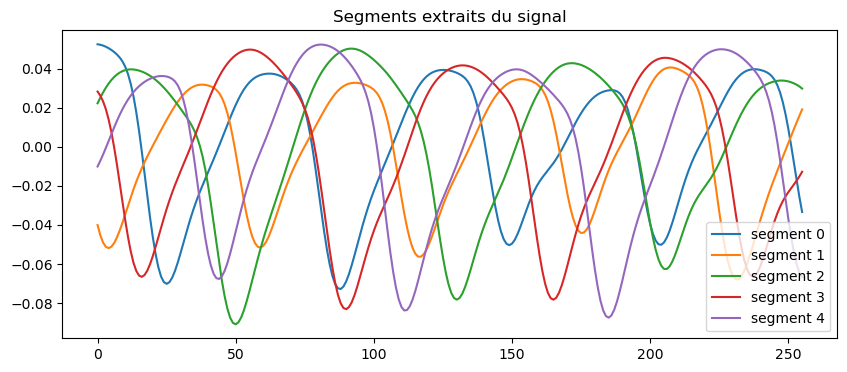

In [5]:
import torch
import matplotlib.pyplot as plt

segment_size = 256

# Découpage sans recouvrement
segments = xt.unfold(0, segment_size, segment_size)  # shape: [nb_segments, 256]
segments = segments.unsqueeze(1)  # shape: [nb_segments, 1, 256] pour Conv1d
print(f"{segments.shape[0]} segments créés")

# Affichage de 5 exemples
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.plot(segments[i].squeeze().numpy(), label=f'segment {i}')
plt.legend()
plt.title("Segments extraits du signal")
plt.show()


In [6]:
segments = segments[:22638]

In [7]:

dataloader = DataLoader(segments, batch_size=32, shuffle=True)

In [8]:
import torch.nn as nn
import torch.optim as optim

model = UNet1D(in_channels=1)  # modèle corrigé vu plus haut
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

n_epochs = 10
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

for epoch in range(n_epochs):
    for x in dataloader:
        x = x.squeeze(1)
        x = x.to(device)
        t = torch.randint(0, 1000, (x.shape[0],), device=device)
        x_noisy, noise = add_noise(x, t)
        pred_noise = model(x_noisy, t.float())
        loss = loss_fn(pred_noise, noise)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")


Epoch 1 - Loss: 0.9902
Epoch 2 - Loss: 0.9717
Epoch 3 - Loss: 0.9128
Epoch 4 - Loss: 0.6056
Epoch 5 - Loss: 0.3879
Epoch 6 - Loss: 0.4044
Epoch 7 - Loss: 0.5813
Epoch 8 - Loss: 0.4672
Epoch 9 - Loss: 0.5325
Epoch 10 - Loss: 0.3959


In [9]:


# Exemple : générer un segment
generated = def(model, (1, 1, 256)).detach().cpu().squeeze().numpy()

# Affichage
plt.plot(generated)
plt.title("Signal débruité (sample généré)")
plt.show()


SyntaxError: invalid syntax (2498193850.py, line 2)

In [ ]:
x = segments[0]
x[0,0][130:160] = -0.04

In [ ]:
plt.plot(x[0,0])
plt.title("Signal débruité (sample généré)")
plt.show()

In [ ]:
plt.plot(segments[0,0,0])
plt.title("Signal débruité (sample généré)")
plt.show()